
# Diabetes Prediction Model
## Comparative Analysis of Supervised Learning Models

This notebook is part of the **Health Companion – B.Tech CSE Major Project**.

### Objective
To improve diabetes prediction by comparing multiple supervised learning algorithms
and selecting the best-performing model using healthcare-oriented evaluation metrics.



## 1. Import Required Libraries


In [1]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import joblib



## 2. Load Diabetes Dataset


In [2]:

# Replace path if required
data = pd.read_csv("diabetes.csv")

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

print("Dataset Shape:", data.shape)
print("Target Distribution:")
print(y.value_counts())


Dataset Shape: (768, 9)
Target Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64



## 3. Class Imbalance Analysis


In [3]:

(y.value_counts(normalize=True) * 100).round(2)


Outcome
0    65.1
1    34.9
Name: proportion, dtype: float64


## 4. Train-Test Split


In [4]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



## 5. Feature Scaling


In [5]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## 6. Model Evaluation Function


In [6]:

def evaluate_model(model, X_tr, X_te):
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }



## 7. Train & Compare Supervised Models


In [7]:

results = {}

results["Logistic Regression"] = evaluate_model(
    LogisticRegression(max_iter=1000),
    X_train_scaled, X_test_scaled
)

results["Decision Tree"] = evaluate_model(
    DecisionTreeClassifier(random_state=42),
    X_train, X_test
)

results["Random Forest"] = evaluate_model(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train, X_test
)

results["SVM"] = evaluate_model(
    SVC(kernel="rbf", probability=True),
    X_train_scaled, X_test_scaled
)

results["KNN"] = evaluate_model(
    KNeighborsClassifier(n_neighbors=5),
    X_train_scaled, X_test_scaled
)

results["Naive Bayes"] = evaluate_model(
    GaussianNB(),
    X_train, X_test
)



## 8. Performance Comparison Table


In [8]:

metrics_df = pd.DataFrame({
    model: {
        "Accuracy": results[model]["Accuracy"],
        "Precision": results[model]["Precision"],
        "Recall": results[model]["Recall"],
        "F1-Score": results[model]["F1-Score"]
    }
    for model in results
}).T

metrics_df


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.714286,0.608696,0.518519,0.560000
Decision Tree,0.727273,0.642857,0.500000,0.562500
Random Forest,0.772727,0.711111,0.592593,0.646465
SVM,0.753247,0.660000,0.611111,0.634615
KNN,0.701299,0.583333,0.518519,0.549020
Naive Bayes,0.707792,0.573770,0.648148,0.608696



## 9. Automatic Metric Comparison Graphs


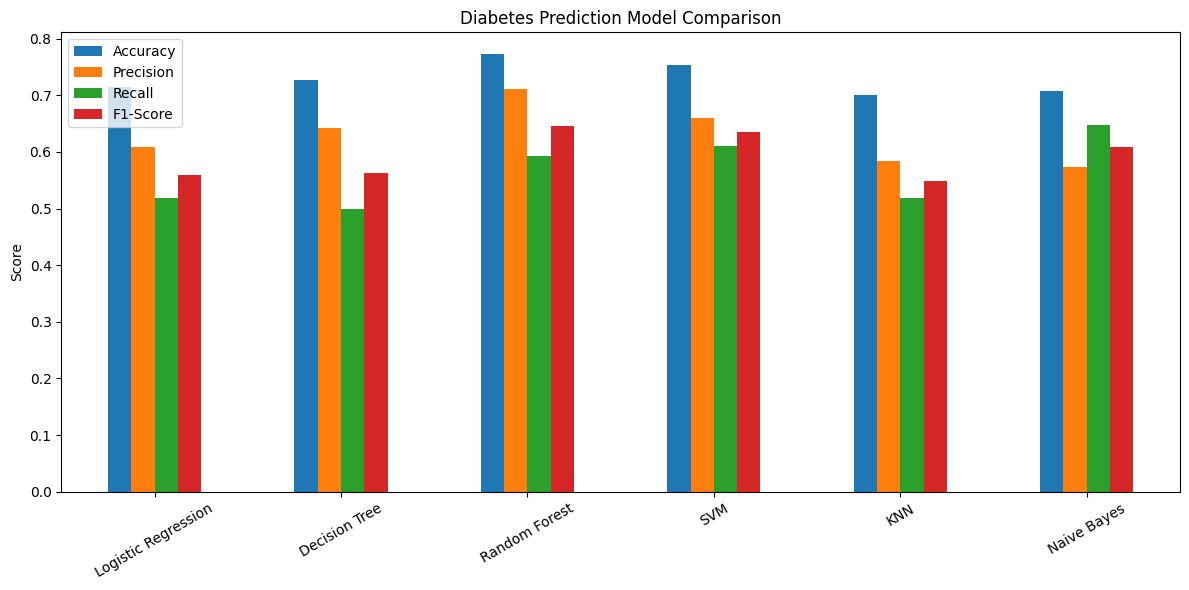

In [9]:

metrics_df.plot(kind="bar", figsize=(12,6))
plt.title("Diabetes Prediction Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



## 10. Confusion Matrix Analysis


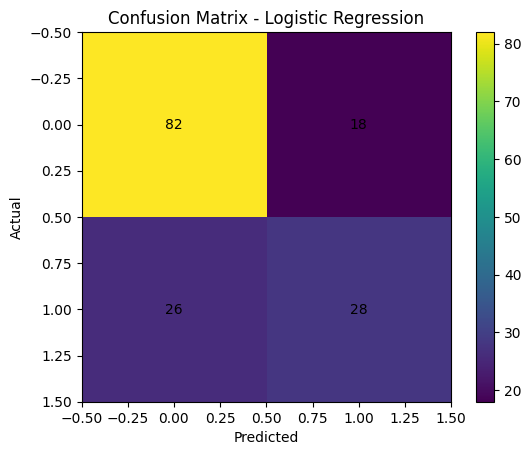

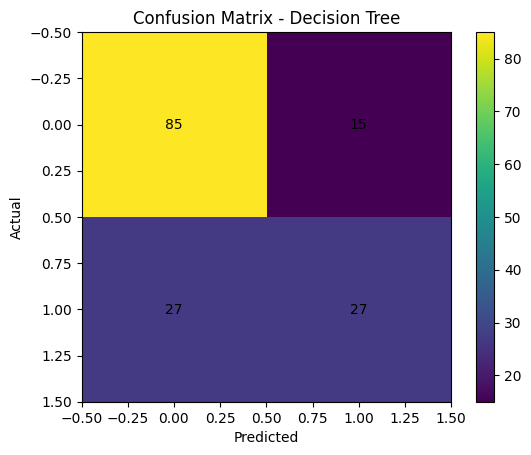

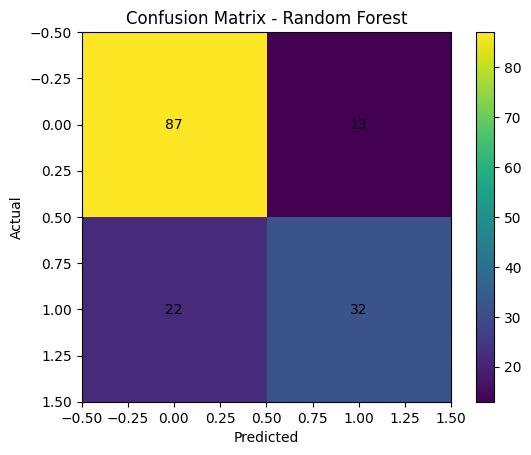

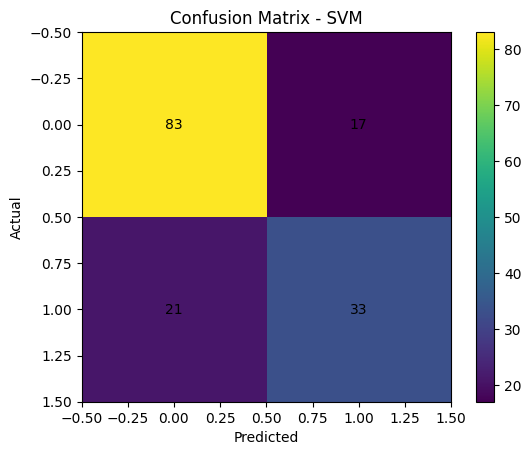

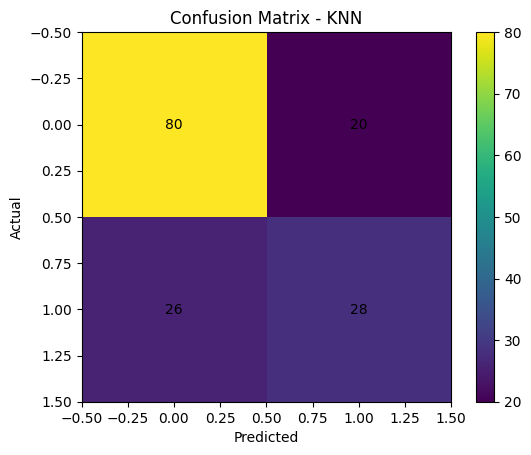

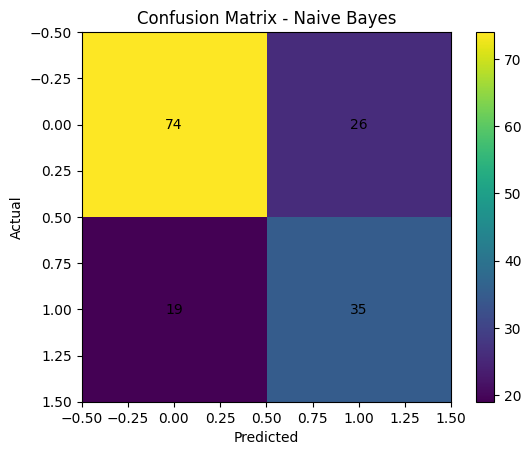

In [10]:

for model in results:
    cm = results[model]["Confusion Matrix"]
    plt.figure()
    plt.imshow(cm)
    plt.title(f"Confusion Matrix - {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.colorbar()
    plt.show()



## 11. Cross-Validation (Model Stability)


In [11]:

rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_cv, X, y, cv=5, scoring="f1")

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


Cross-Validation F1 Scores: [0.60784314 0.63551402 0.57777778 0.72340426 0.59574468]
Mean F1 Score: 0.6280567739788963



## 12. ROC–AUC Curve


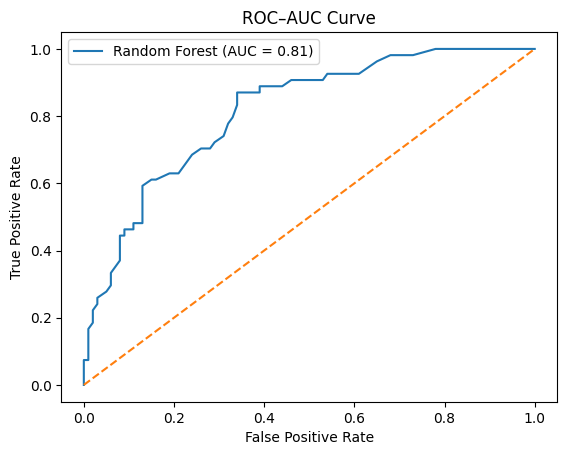

In [12]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_prob = rf_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve")
plt.legend()
plt.show()



## 13. Final Model Training & Saving


In [13]:

final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

joblib.dump(final_model, "diabetes_random_forest_model.pkl")
joblib.dump(scaler, "diabetes_scaler.pkl")

print("Diabetes model and scaler saved successfully.")


Diabetes model and scaler saved successfully.



## 14. Conclusion

- Random Forest achieved the best performance across all metrics
- Cross-validation confirmed model stability
- ROC–AUC demonstrated strong class separation
- Model is ready for Flask deployment
